In [1]:
import pandas as pd
from bqplot import pyplot as bqplt
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import widgets as w
from bqplot import LinearScale, DateScale, Axis, Lines, Figure, Tooltip, Scatter
import bqplot

Synesthesia 

https://scipython.com/blog/converting-a-spectrum-to-a-colour/

https://ipywidgets.readthedocs.io/en/stable/examples/Beat%20Frequencies.html

https://stackoverflow.com/questions/52547769/how-can-i-layout-a-list-of-ipython-display-audio-objects-in-a-jupyter-notebook/57825569

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [3]:
from colour_system import ColourSystem, illuminant_D65, cs_hdtv, cs_smpte, cs_srgb, get_spec

In [4]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import Audio, display
import numpy as np

In [5]:
def beat_freq(f1=220.0, a1=0.5, f2=224.0, a2 =0.5):
    max_time = 20
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = a1*np.sin(2*np.pi*f1*times) + a2*np.sin(2*np.pi*f2*times)
    display(Audio(data=signal, rate=rate,autoplay=True, normalize=False))
    return signal

In [6]:
f1_w = widgets.FloatSlider(min = 380.0, max=780.0, step=1.0, value=400.0, continuous_update=False)
f2_w = widgets.FloatSlider(min = 380.0, max=780.0, step=1.0, value=450.0, continuous_update=False)
a1_w = widgets.FloatSlider(min = 0.1, max=2.0, step=0.1, value=1.0, continuous_update=False)
a2_w = widgets.FloatSlider(min = 0.1, max=2.0, step=0.1, value=1.0, continuous_update=False)

# def update_outputs(d):
#     """update the plot and the audio widget"""
#     signal = beat_freq(f1_w.value, a1_w.value, f2_w.value,  a2_w.value)
#     make_beat_freq_widget()

# f1_w.observe(update_outputs)
# f2_w.observe(update_outputs)
# a1_w.observe(update_outputs)
# a2_w.observe(update_outputs)

In [7]:
w.VBox([w.HBox([w.Label("f1"), f1_w]), 
        w.HBox([w.Label("f2"), f2_w]),
        w.HBox([w.Label("a1"), a1_w]), 
        w.HBox([w.Label("a2"), a2_w])])

In [8]:
cs = cs_hdtv
sig = beat_freq(f1=f1_w.value, a1=a1_w.value, f2=f2_w.value,  a2 =a2_w.value)
(f1, a1, f2, a2) = (f1_w.value, a1_w.value*7e14, f2_w.value, a2_w.value*7e14)
spec = get_spec(f1, a1, f2, a2).values
fig, ax = plt.subplots()
html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

circle = Circle(xy=(0.5, 0.5), radius=0.5, fc=html_rgb)
ax.add_patch(circle)
ax.set_facecolor('k')
plt.show()

ValueError: Audio data must be between -1 and 1 when normalize=False.

In [ ]:
# can't manage to get the output widget
def make_beat_freq_widget(f1=220.0, a1=0.5, f2=224.0, a2 =0.5):
    audio_out = widgets.Output()
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = a1*np.sin(2*np.pi*f1*times) + a2*np.sin(2*np.pi*f2*times)
    with audio_out:
        display(Audio(data=signal, rate=rate))
    return audio_out

In [ ]:
def make_beat_freq_widget(d):
    f1=f1_w.value
    a1=a1_w.value
    f2=f2_w.value
    a2 =a2_w.value
    audio_out = widgets.Output()
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = a1*np.sin(2*np.pi*f1*times) + a2*np.sin(2*np.pi*f2*times)
    with audio_out:
        display(Audio(data=signal, rate=rate, autoplay=True, normalize=False))
    return audio_out

In [ ]:
# autoplay interactive
v = interactive(beat_freq, f1=(100.0,780.0), f2=(100.0,780.0), a1=(0.0,0.5), a2=(0.0,0.5))
display(v)

In [ ]:
def beat_freq_and_fig(f1=531.0, f2=620.7, a1=1.0):
    """autoplay sound and matplotlib display"""
    
    # put this back in the signature when 
    # we figure out how to un-normalize the 
    # component signals
    a2 = 2-a1 
    max_time = 20
    rate = 8000
    
    pitch_1 = 2*f1 - 500
    pitch_2 = 2*f2 - 500
    times = np.linspace(0,max_time,rate*max_time)
    sig1 = a1*np.sin(2*np.pi*pitch_1*times) 
    sig2 = a2*np.sin(2*np.pi*pitch_2*times)
    display(Audio(data=sig1+sig2, rate=rate,autoplay=True))
    spec1 = get_spec(f1, a1).values
    spec2 = get_spec(f2, a2).values
    spec3 = spec1 + spec2
    fig, ax = plt.subplots()
    html_rgb_1 = cs.spec_to_rgb(spec1, out_fmt='html')
    html_rgb_2 = cs.spec_to_rgb(spec2, out_fmt='html')
    html_rgb_3 = cs.spec_to_rgb(spec3, out_fmt='html')

    circle1 = Circle(xy=(0.25, 0.5), radius=0.15*a1, fc=html_rgb_1)
    circle2 = Circle(xy=(0.75, 0.5), radius=0.15*a2, fc=html_rgb_2)
    circle3 = Circle(xy=(0.25 * a1/(a1+a2) + 0.75*a2/(a1+a2), 0.5), 
                     radius=0.15 * (a1 + a2) / 2, 
                     fc=html_rgb_3)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    ax.set_facecolor('k')
    plt.show()
    return

Suggestion

Side-by-side or toggle:

one slider controls apparent color, the other slider the gap between wavelengths

We seem to be missing an amplitude dimension. We have relative volume and relative brightness when we mix the two signals, but there is an unwanted normalization happening when they are on their own. When a1 goes to zero, the circle should fade to black. 

It would be cool to either be able to mix colors on an ipad and have it make the corresponding tones, or give it a live audio input and have it display the component and composite colors

In [9]:
# what's going on at f1 = 565.0 vs 565.1, f2 = 425.0.
# very rapid change from warm to cool

In [10]:
# autoplay interactive
v = interactive(beat_freq_and_fig, f1=(381.0,779.0), f2=(381.0,779.0), a1=(0.0,2.0))
display(v)

NameError: name 'beat_freq_and_fig' is not defined

We should do chords like this, potentially with some kind of venn diagram or something

Or, take a midi piano track. Shostakovich would be cool, or maybe Bach. Something mathematical sounding.

For the current input, There should be more sounds. And some lower pitch ones. It sounds cooler when you have lots of these widgets going. 

Maybe the sliders could control whole chords whose root note can shift continuously, or you can modify the intensity of harmonics?

would be good to have a fixed pallette of pitches that are harmonious, and draw from them

In general they should make crazy psychelelic sound input apps on iPad. Like you drag your finger across the surface and an iridescent trace follows it, and a corresponding sound. Maybe the pitch and color correspond to a measure of the energy, and the surface of the ipad is like the surface of water. Or something that looks like a ctenephor. I want a combination of a zip and a tinkle sound. 

In [ ]:
def beat_freq_and_fig_more(f1=533.20, f2=456.20, f3=590.60, a1=1.0, a2=1.0):
    """autoplay sound and matplotlib display"""
    
    # put this back in the signature when 
    # we figure out how to un-normalize the 
    # component signals
    a3 = 3-a1-a2 
    max_time = 5
    rate = 8000
    
    pitch_1 = 2*f1 - 500
    pitch_2 = 2*f2 - 500
    pitch_3 = 2*f3 - 500
    times = np.linspace(0,max_time,rate*max_time)
    sig1 = 3*a1*np.sin(2*np.pi*pitch_1*times)-0.5 
    sig2 = 3*a2*np.sin(2*np.pi*pitch_2*times)-0.5
    sig3 = 3*a3*np.sin(2*np.pi*pitch_3*times)-0.5
    display(Audio(data=sig1+sig2+sig3, rate=rate,autoplay=True))
    spec1 = get_spec(f1, a1).values
    spec2 = get_spec(f2, a2).values
    spec3 = get_spec(f3, a3).values
    spec_tot = spec1 + spec2 + spec3
    fig, ax = plt.subplots()
    html_rgb_1 = cs.spec_to_rgb(spec1, out_fmt='html')
    html_rgb_2 = cs.spec_to_rgb(spec2, out_fmt='html')
    html_rgb_3 = cs.spec_to_rgb(spec3, out_fmt='html')
    html_rgb_tot = cs.spec_to_rgb(spec_tot, out_fmt='html')

    circle1 = Circle(xy=(0.25, 0.25), radius=0.15*a1, fc=html_rgb_1)
    circle2 = Circle(xy=(0.5, 0.75), radius=0.15*a2, fc=html_rgb_2)
    circle3 = Circle(xy=(0.75, 0.25), radius=0.15*a3, fc=html_rgb_3)
    circle_tot = Circle(xy=(0.25 * a1/(a1+a2+a3) + 0.5*a2/(a1+a2+a3) + 0.75 * a3/(a1+a2+a3),
                            0.25 * a1/(a1+a2+a3) + 0.75*a2/(a1+a2+a3) + 0.25 * a3/(a1+a2+a3)), 
                     radius=0.15 * (a1 + a2 + a3) / 3, 
                     fc=html_rgb_tot)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    ax.add_patch(circle_tot)
    ax.set_facecolor('k')
    plt.show()
    return

In [ ]:
# autoplay interactive
v = interactive(beat_freq_and_fig_more, f1=(381.0,779.0), f2=(381.0,779.0), f3=(381.0,779.0), a1=(0.0,2.0),
                a2=(0.0,2.0))
display(v)

In [ ]:
(f1, a1, f2, a2) = (600, 7e14, 400, 7e14)
spec = get_spec(f1, a1, f2, a2)
fig, ax = plt.subplots()
html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

# Place and label a circle with the colour of a black body at temperature T
# x, y = i % 6, -(i // 6)
circle = Circle(xy=(0.5, 0.5), radius=0.5, fc=html_rgb)
ax.add_patch(circle)
ax.set_facecolor('k')
plt.show()

In [ ]:
import numpy as np
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# from colour_system import cs_hdtv
cs = cs_hdtv

def planck(lam, T):
    """ Returns the spectral radiance of a black body at temperature T.

    Returns the spectral radiance, B(lam, T), in W.sr-1.m-2 of a black body
    at temperature T (in K) at a wavelength lam (in nm), using Planck's law.

    """

    lam_m = lam / 1.e9
    fac = h*c/lam_m/k/T
    B = 2*h*c**2/lam_m**5 / (np.exp(fac) - 1)
    return B

fig, ax = plt.subplots()

# The grid of visible wavelengths corresponding to the grid of colour-matching
# functions used by the ColourSystem instance.
lam = np.arange(380., 781., 5)

for i in range(24):
    # T = 500 to 12000 K
    T = 500*i + 500

    # Calculate the black body spectrum and the HTML hex RGB colour string
    # it looks like
    spec = planck(lam, T)
    html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

    # Place and label a circle with the colour of a black body at temperature T
    x, y = i % 6, -(i // 6)
    circle = Circle(xy=(x, y*1.2), radius=0.4, fc=html_rgb)
    ax.add_patch(circle)
    ax.annotate('{:4d} K'.format(T), xy=(x, y*1.2-0.5), va='center',
                ha='center', color=html_rgb)

# Set the limits and background colour; remove the ticks
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-4.35, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('k')
# Make sure our circles are circular!
ax.set_aspect("equal")
plt.show()

In [ ]:
planck(lam, T)

In [ ]:
# try to use interactive
# unfortunately bqplot doesn't work with interactive. 
def beat_freq_2(f1=400.0, a1=1.0, f2=500.0, a2 =1.0):

    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = a1*np.sin(2*np.pi*f1*times) + a2*np.sin(2*np.pi*f2*times)
    display(Audio(data=signal, rate=rate))
    
    fig = bqplt.figure()
        
    spec = get_spec(f1, a1*7e14, f2, a2=7e14).values

    html_rgb = cs.spec_to_rgb(spec, out_fmt='html')
    patch = bqplt.plot([],[],
                     fill_colors=[html_rgb],
                 fill='inside',
                 axes_options={'x': {'visible': False}, 'y': {'visible': False}},
                 stroke_width=10,
                 close_path=True,
                 display_legend=True)

    patch.x = [[0, 1, 1, 0]], 
    patch.y = [[0, 1, 0, 1]]
    display(patch)
    return signal

interactive(beat_freq_2, f1=(382.0,778.0), a1=(0.0,2.0), f2=(382.0,778.0),  a2=(0.0,2.0))

In [ ]:
(f1, a1, f2, a2) = (381, 7e14, 500, 7e14)
spec = get_spec(f1, a1, f2, a2).values
fig, ax = plt.subplots()
html_rgb = cs_hdtv.spec_to_rgb(spec, out_fmt='html')

# Place and label a circle with the colour of a black body at temperature T
# x, y = i % 6, -(i // 6)
circle = Circle(xy=(0.5, 0.5), radius=0.5, fc=html_rgb)
ax.add_patch(circle)
ax.set_facecolor('k')
plt.show()

In [ ]:
html_rgb

In [ ]:
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.pyaudio_helper as pah

In [ ]:
L_gain = widgets.FloatSlider(description = 'L Gain',
    continuous_update = True,
    value = 1.0,
    min = 0.0,
    max = 2.0,
    step = 0.01,
    orientation = 'vertical')
R_gain = widgets.FloatSlider(description = 'R Gain',
    continuous_update = True,
    value = 1.0,
    min = 0.0,
    max = 2.0,
    step = 0.01,
    orientation = 'vertical')

# Matplotlib-venn

In [ ]:
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))

In [ ]:
from matplotlib_venn import venn3
venn3(subsets = (1, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('', '', ''))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('001').set_text('')
v.get_label_by_id('011').set_text('')
v.get_label_by_id('110').set_text('')
v.get_label_by_id('101').set_text('')
v.get_label_by_id('111').set_text('')
# v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='-')

plt.show()

In [28]:
from matplotlib_venn import venn3, venn3_circles
from itertools import product
# non-Normalization is not wor


def beat_freq_and_fig_venn(f1=455.5, f2=520.5, f3=590.60, a1=0.3, a2=0.3, a3=0.3):
    """autoplay sound and matplotlib display"""
    cs = cs_hdtv
    # put this back in the signature when 
    # we figure out how to un-normalize the 
    # component signals
    max_time = 5
    rate = 8000
    
    amp_tot = a1 + a2 + a3
    if amp_tot > 1.0:
        a1/=amp_tot
        a2/=amp_tot
        a3/=amp_tot
    pitch_1 = 2*f1 - 500
    pitch_2 = 2*f2 - 500
    pitch_3 = 2*f3 - 500
    times = np.linspace(0,max_time,rate*max_time)
    sig1 = a1*np.sin(2*np.pi*pitch_1*times) 
    sig2 = a2*np.sin(2*np.pi*pitch_2*times)
    sig3 = a3*np.sin(2*np.pi*pitch_3*times)
    sig_tot = sig1+sig2+sig3

    display(Audio(data=sig_tot, rate=rate,autoplay=True, normalize=False))
    
    spec1 = get_spec(f1, a1).values
    spec2 = get_spec(f2, a2).values
    spec3 = get_spec(f3, a3).values

    plt.figure(figsize=(4,4), facecolor='k')
    v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('', '', ''))
    # this would be easy to do by iteration over the cartesian product:
    for elem in product([0,1],[0,1],[0,1]):
        if elem != (0,0,0):
            this_id = str(elem[0])+str(elem[1])+str(elem[2])  # eg '100', '010', etc
            this_spec = elem[0]*spec1 + elem[1]*spec2 + elem[2]*spec3
            this_rgb = cs.spec_to_rgb(this_spec, out_fmt='html', normalize=False)
            v.get_patch_by_id(this_id).set_color(this_rgb)
            v.get_patch_by_id(this_id).set_alpha(1.0)
            v.get_label_by_id(this_id).set_text('')

    c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='-')

    plt.show()
    return

In [30]:
# autoplay interactive
v = interactive(beat_freq_and_fig_venn, f1=(381.0,779.0), f2=(381.0,779.0), f3=(381.0,779.0), a1=(0.0,1.0, 0.01),
                a2=(0.0,1.0, 0.01), a3=(0.0,1.0, 0.01))
display(v)

interactive(children=(FloatSlider(value=455.5, description='f1', max=779.0, min=381.0), FloatSlider(value=520.…

# plot distributions of swim times for men and women, granite man triathlon:

In [ ]:

pathname = "/Users/claywcampaigne/Desktop/Granite_Man_Triathlon_INDIVIDUALS.csv"
tridata = pd.read_csv(pathname)
tridata.loc[:157,'Swim'] = '01:' +tridata.loc[:157,'Swim']
tridata.loc[158:,'Swim'] = '0' +tridata.loc[158:,'Swim']
df = pd.DataFrame(index=tridata.index)
df['swimtime'] = pd.to_timedelta(tridata['Swim']).dt.total_seconds()
df['sex'] = tridata['Sex']
fig, ax = plt.subplots()
ax.hist(df.loc[df['sex']=='M','swimtime'], bins=20, color='blue', alpha=0.5,label='men')
ax.hist(df.loc[df['sex']=='F','swimtime'], bins=20, color='red', alpha=0.5, label='women')
fig.legend()

# colour-science package:

In [64]:
import pandas as pd
import colour
import numpy as np
from colour.plotting import *

455.5, f2=520.5, f3=590.60,

In [18]:
data_sample_1 = {440:0, 450:0, 455:10, 460:0, 500:0}

In [97]:
def wvl_int_to_sd(wv, amp, gridspace=1):
    """Get a delta function for a single wavelength"""
    data_sample = {i:0.0 for i in range(360, 831, gridspace)}
    data_sample[int(gridspace*np.round(wv/gridspace))] = amp 
    return colour.SpectralDistribution(data_sample)

In [ ]:
def specd_to_rgb(sd):
    return colour.XYZ_to_sRGB(colour.sd_to_XYZ(sd)

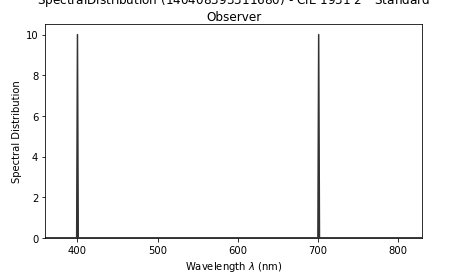

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'SpectralDistribution (140408393311680) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [98]:
sd_ = wvl_int_to_sd(701.1,10) + wvl_int_to_sd(400.1,10)
color.plotting.plot_single_sd(sd_)

In [107]:
rgb_swatch

array([ 0.64904192, -1.62078967,  0.8412228 ])

In [124]:
rgb_swatch

array([ 0.64904192, -1.62078967,  0.8412228 ])

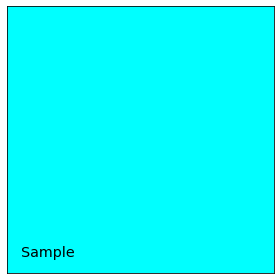

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [143]:
sd_ = wvl_int_to_sd(480,10) + wvl_int_to_sd(490,10)
rgb_swatch = colour.XYZ_to_sRGB(colour.sd_to_XYZ(sd_))
colour.plotting.plot_single_colour_swatch(
    ColourSwatch('Sample', rgb_swatch),
    text_kwargs={'size': 'x-large'})


In [ ]:
# min is 360
# max is 830

/Users/claywcampaigne/anaconda3/envs/synesthesia/lib/python3.7/site-packages/colour/plotting/common.py:552: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axes.set_ylim(settings.bounding_box[2], settings.bounding_box[3])


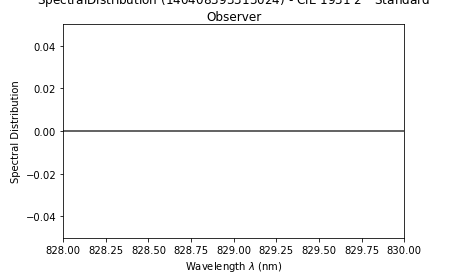

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'SpectralDistribution (140408393313024) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [59]:
color.plotting.plot_single_sd(wvl_int_to_sd(831,10))

In [40]:
wvl_int_to_sd(700,10)+wvl_int_to_sd(500,10)

SpectralDistribution([[ 497.,   nan],
                      [ 498.,   nan],
                      [ 499.,   nan],
                      [ 500.,   nan],
                      [ 501.,   nan],
                      [ 502.,   nan],
                      [ 503.,   nan],
                      [ 697.,   nan],
                      [ 698.,   nan],
                      [ 699.,   nan],
                      [ 700.,   nan],
                      [ 701.,   nan],
                      [ 702.,   nan],
                      [ 703.,   nan]],
                     interpolator=SpragueInterpolator,
                     interpolator_kwargs={},
                     extrapolator=Extrapolator,
                     extrapolator_kwargs={'method': 'Constant', 'left': None, 'right': None})

In [19]:
sd = colour.SpectralDistribution(data_sample)

In [20]:
sd

SpectralDistribution([[ 440.,    0.],
                      [ 450.,    0.],
                      [ 455.,   10.],
                      [ 460.,    0.],
                      [ 500.,    0.]],
                     interpolator=CubicSplineInterpolator,
                     interpolator_kwargs={},
                     extrapolator=Extrapolator,
                     extrapolator_kwargs={'method': 'Constant', 'left': None, 'right': None})

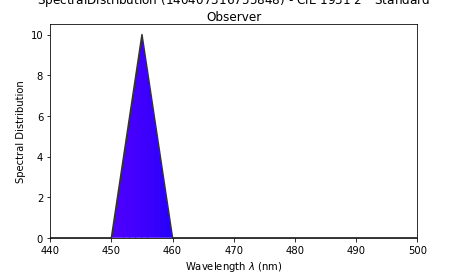

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'SpectralDistribution (140407316755848) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [22]:
colour.plotting.plot_single_sd(sd)

In [12]:
sd = colour.SpectralDistribution(data_sample, name='Sample')